In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import utils
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
%matplotlib inline

# Load train data

In [2]:
train_data = pd.read_csv("exoTrain.csv")
print("(rows, columns) in train data:", train_data.shape)
print(train_data.groupby('LABEL').size())

(rows, columns) in train data: (5087, 3198)
LABEL
1    5050
2      37
dtype: int64


# Load test data

In [3]:
test_data = pd.read_csv("exoTest.csv")
print("(rows, columns) in test data:", test_data.shape)
print(test_data.groupby('LABEL').size())

(rows, columns) in test data: (570, 3198)
LABEL
1    565
2      5
dtype: int64


## Prepare X_train, y_train, X_test, y_test

In [4]:
X_train = np.array(train_data.drop(['LABEL'], 1))
y_train = np.array(train_data['LABEL'])
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_test = np.array(test_data.drop(['LABEL'], 1))
y_test = np.array(test_data['LABEL'])
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (5087, 3197)
y_train:  (5087,)
X_test:  (570, 3197)
y_test:  (570,)


# Plot

In [5]:
print("Flux from the first star (confirmed exoplanet):\n", X_train[0])
print("\nFlux from the last star (confirmed non-exoplanet):\n", X_train[-1])

Flux from the first star (confirmed exoplanet):
 [ 93.85  83.81  20.1  ...  61.42   5.08 -39.54]

Flux from the last star (confirmed non-exoplanet):
 [323.28 306.36 293.16 ... -16.72 -14.09  27.82]


In [6]:
time = np.arange(3197)
flux_star_with_exoplanet = X_train[0]
flux_star_without_exoplanet = X_train[-1]

### Scatter plot for star 1 with confirmed exoplanet

Text(0, 0.5, 'flux')

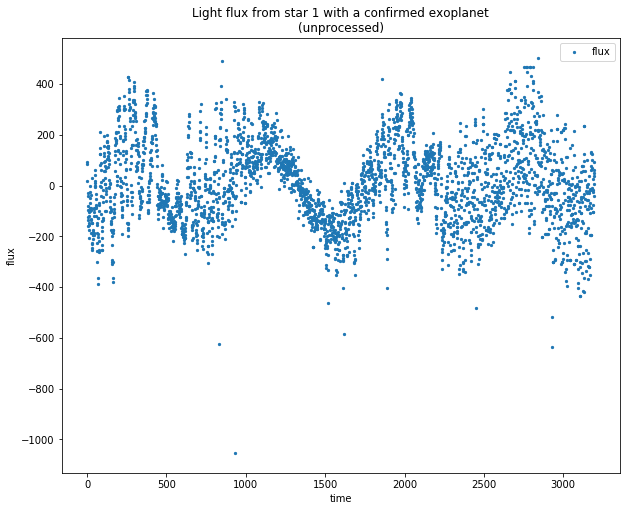

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_with_exoplanet, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 1 with a confirmed exoplanet\n(unprocessed)")
plt.xlabel('time')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

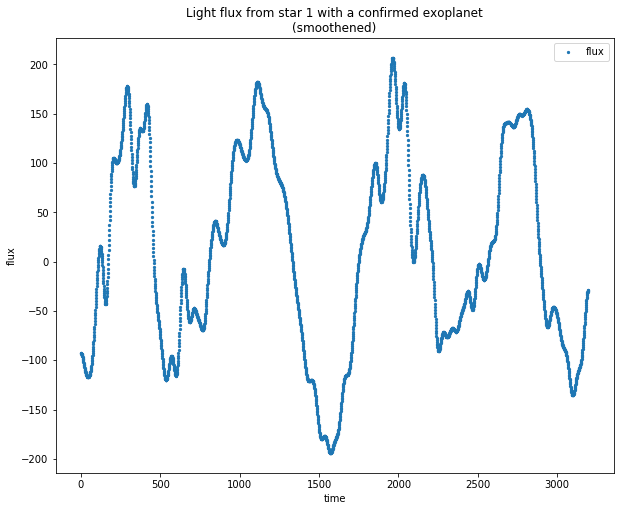

In [8]:
flux_star_with_exoplanet_smoothened = ndimage.filters.gaussian_filter(flux_star_with_exoplanet, sigma=20)
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_with_exoplanet_smoothened, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 1 with a confirmed exoplanet\n(smoothened)")
plt.xlabel('time')
plt.ylabel('flux')

### Scatter plot for star 5087 with confirmed non-exoplanet

Text(0, 0.5, 'flux')

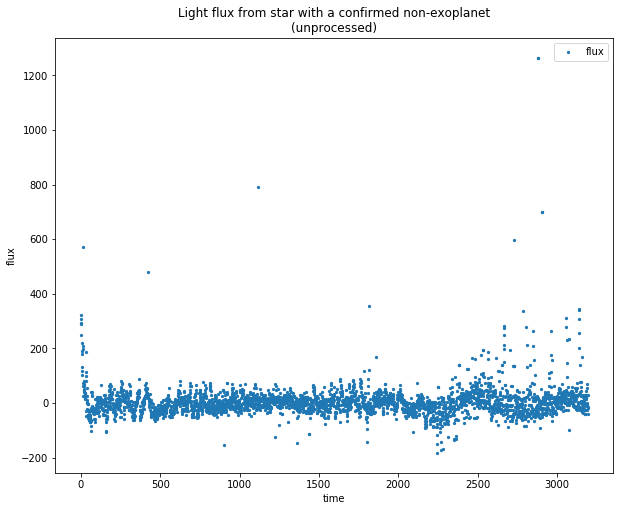

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_without_exoplanet, label='flux', s=5)
plt.legend()
plt.title("Light flux from star with a confirmed non-exoplanet\n(unprocessed)")
plt.xlabel('time')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

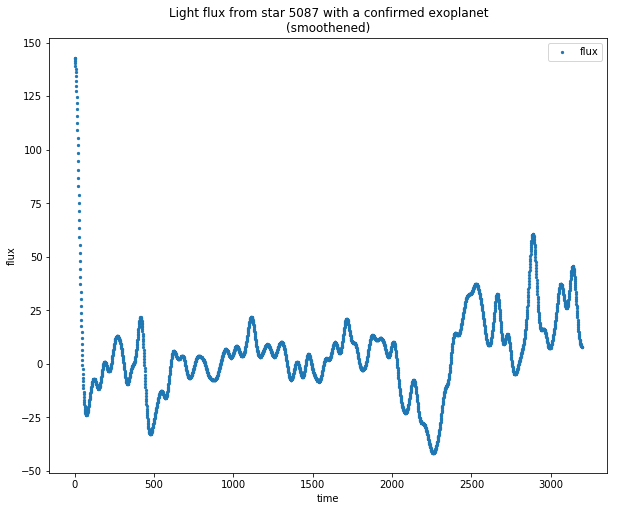

In [10]:
flux_star_without_exoplanet_smoothened = ndimage.filters.gaussian_filter(flux_star_without_exoplanet, sigma=20)
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_without_exoplanet_smoothened, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 5087 with a confirmed exoplanet\n(smoothened)")
plt.xlabel('time')
plt.ylabel('flux')

# Preprocess

### Normalize

In [11]:
X_train = normalize(X_train, norm = 'l1')
print("Normalized X_train:\n", X_train[0])
X_test = normalize(X_test, norm = 'l1')
print("\nNormalized X_test:\n", X_test[0])

Normalized X_train:
 [ 2.26548063e-04  2.02312128e-04  4.85201499e-05 ...  1.48264060e-04
  1.22628041e-05 -9.54471009e-05]

Normalized X_test:
 [0.00179511 0.00150056 0.00129467 ... 0.00053578 0.0040345  0.00086431]


### Scale

In [12]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
print("Scaled X_train:\n", X_train[0])
X_test = std_scaler.fit_transform(X_test)
print("\nScaled X_test:\n", X_test[0])

Scaled X_train:
 [ 0.16723865  0.15615957  0.03171895 ...  0.18321051 -0.01167572
 -0.24306627]

Scaled X_test:
 [1.35897676 1.25854248 1.14310918 ... 1.34664509 4.11277064 1.88708758]


# Define models

In [13]:
model_one = svm.SVC(kernel='linear', gamma='scale', random_state=42)
model_two = neighbors.KNeighborsClassifier(n_jobs=-1)

### SVC with linear kernel

In [14]:
model_one.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
accuracy_model_one_default = model_one.score(X_test, y_test)
print(accuracy_model_one_default)

0.9666666666666667


### Test SVC with linear kernel

In [16]:
y_predicted = model_one.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Recall: ", recall_score(y_test, y_predicted))
print("Precision: ", precision_score(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

Accuracy:  0.9666666666666667
Recall:  0.9752212389380531
Precision:  0.9910071942446043
Confusion matrix:
 [[551  14]
 [  5   0]]


### KNN

In [17]:
model_two.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
accuracy_model_two_default = model_two.score(X_test, y_test)
print(accuracy_model_two_default)

0.9912280701754386


### Test KNN

In [19]:
y_predicted = model_two.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Recall: ", recall_score(y_test, y_predicted))
print("Precision: ", precision_score(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

Accuracy:  0.9912280701754386
Recall:  1.0
Precision:  0.9912280701754386
Confusion matrix:
 [[565   0]
 [  5   0]]


# Combine train and test data

In [20]:
combined_data = pd.concat([train_data, test_data])
print("(rows, columns) in combined data:", combined_data.shape)

(rows, columns) in combined data: (5657, 3198)


In [21]:
X_combined = np.array(combined_data.drop(['LABEL'], 1))
y_combined = np.array(combined_data['LABEL'])
print("X_combined: ", X_combined.shape)
print("y_combined: ", y_combined.shape)

X_combined:  (5657, 3197)
y_combined:  (5657,)


## Normalize and scale

In [22]:
# Normalize
X_combined = normalize(X_combined, norm = 'l1')
print("Normalized X_combined:\n", X_combined[0])
# Scale
std_scaler = StandardScaler()
X_combined = std_scaler.fit_transform(X_combined)
print("Scaled X_combined:\n", X_combined[0])

Normalized X_combined:
 [ 2.26548063e-04  2.02312128e-04  4.85201499e-05 ...  1.48264060e-04
  1.22628041e-05 -9.54471009e-05]
Scaled X_combined:
 [ 0.16166015  0.15321825  0.02927969 ...  0.20738975  0.01018906
 -0.21346881]


## Balance dataset

In [23]:
sm = SMOTE(random_state=42, ratio=1.0)
X_combined_sm, y_combined_sm = sm.fit_sample(X_combined, y_combined)
print("Shape of original dataset:")
print("X: ", X_combined.shape)
print("y: ", y_combined.shape)
print("Shape of dataset after balancing:")
print("X: ", X_combined_sm.shape)
print("y: ", y_combined_sm.shape)
print("Number of non-exoplanets in original dataset: ", np.count_nonzero(y_combined == 1))
print("Number of exoplanets in original dataset: ", np.count_nonzero(y_combined == 2))
print("Number of non-exoplanets in balanced dataset: ", np.count_nonzero(y_combined_sm == 1))
print("Number of exoplanets in balanced dataset: ", np.count_nonzero(y_combined_sm == 2))

Shape of original dataset:
X:  (5657, 3197)
y:  (5657,)
Shape of dataset after balancing:
X:  (11230, 3197)
y:  (11230,)
Number of non-exoplanets in original dataset:  5615
Number of exoplanets in original dataset:  42
Number of non-exoplanets in balanced dataset:  5615
Number of exoplanets in balanced dataset:  5615


## Split up in different proportions

In [24]:
def split_data(percentage):
    return train_test_split(X_combined_sm,
                            y_combined_sm,
                            test_size=percentage,
                            random_state=42,
                            shuffle=True)

In [25]:
# Split data into train and test (60 : 40)
X_train_60, X_test_60, y_train_60, y_test_60 = split_data(0.40)
print(X_train_60.shape)
print(X_test_60.shape)
print(y_train_60.shape)
print(y_test_60.shape)

(6738, 3197)
(4492, 3197)
(6738,)
(4492,)


In [26]:
# Split data into train and test (65 : 35)
X_train_65, X_test_65, y_train_65, y_test_65 = split_data(0.35)
print(X_train_65.shape)
print(X_test_65.shape)
print(y_train_65.shape)
print(y_test_65.shape)

(7299, 3197)
(3931, 3197)
(7299,)
(3931,)


In [27]:
# Split data into train and test (70 : 30)
X_train_70, X_test_70, y_train_70, y_test_70 = split_data(0.30)
print(X_train_70.shape)
print(X_test_70.shape)
print(y_train_70.shape)
print(y_test_70.shape)

(7861, 3197)
(3369, 3197)
(7861,)
(3369,)


In [28]:
# Split data into train and test (75 : 25)
X_train_75, X_test_75, y_train_75, y_test_75 = split_data(0.25)
print(X_train_75.shape)
print(X_test_75.shape)
print(y_train_75.shape)
print(y_test_75.shape)

(8422, 3197)
(2808, 3197)
(8422,)
(2808,)


In [29]:
# Split data into train and test (80 : 20)
X_train_80, X_test_80, y_train_80, y_test_80 = split_data(0.20)
print(X_train_80.shape)
print(X_test_80.shape)
print(y_train_80.shape)
print(y_test_80.shape)

(8984, 3197)
(2246, 3197)
(8984,)
(2246,)


In [30]:
# Split data into train and test (85 : 15)
X_train_85, X_test_85, y_train_85, y_test_85 = split_data(0.15)
print(X_train_85.shape)
print(X_test_85.shape)
print(y_train_85.shape)
print(y_test_85.shape)

(9545, 3197)
(1685, 3197)
(9545,)
(1685,)


In [31]:
# Split data into train and test (87 : 13)
X_train_87, X_test_87, y_train_87, y_test_87 = split_data(0.13)
print(X_train_87.shape)
print(X_test_87.shape)
print(y_train_87.shape)
print(y_test_87.shape)

(9770, 3197)
(1460, 3197)
(9770,)
(1460,)


## SVC with linear kernel on different percentages of training data

In [32]:
accuracy_model_one = []
print("SVC with linear kernel on 60% training data")
model_one.fit(X_train_60, y_train_60)
print(model_one.score(X_test_60, y_test_60))
accuracy_model_one.append(model_one.score(X_test_60, y_test_60))

print("SVC with linear kernel on 65% training data")
model_one.fit(X_train_65, y_train_65)
print(model_one.score(X_test_65, y_test_65))
accuracy_model_one.append(model_one.score(X_test_65, y_test_65))

print("SVC with linear kernel on 70% training data")
model_one.fit(X_train_70, y_train_70)
print(model_one.score(X_test_70, y_test_70))
accuracy_model_one.append(model_one.score(X_test_70, y_test_70))

print("SVC with linear kernel on 75% training data")
model_one.fit(X_train_75, y_train_75)
print(model_one.score(X_test_75, y_test_75))
accuracy_model_one.append(model_one.score(X_test_75, y_test_75))

print("SVC with linear kernel on 80% training data")
model_one.fit(X_train_80, y_train_80)
print(model_one.score(X_test_80, y_test_80))
accuracy_model_one.append(model_one.score(X_test_80, y_test_80))

print("SVC with linear kernel on 85% training data")
model_one.fit(X_train_85, y_train_85)
print(model_one.score(X_test_85, y_test_85))
accuracy_model_one.append(model_one.score(X_test_85, y_test_85))

print("SVC with linear kernel on 87% training data")
model_one.fit(X_train_87, y_train_87)
print(model_one.score(X_test_87, y_test_87))
accuracy_model_one.append(model_one.score(X_test_87, y_test_87))

print("SVC (linear) accuracies:\n", accuracy_model_one)

SVC with linear kernel on 60% training data
0.9857524487978628
SVC with linear kernel on 65% training data
0.988552531162554
SVC with linear kernel on 70% training data
0.9905016325319086
SVC with linear kernel on 75% training data
0.99002849002849
SVC with linear kernel on 80% training data
0.9884238646482636
SVC with linear kernel on 85% training data
0.9893175074183976
SVC with linear kernel on 87% training data
0.9904109589041096
SVC (linear) accuracies:
 [0.9857524487978628, 0.988552531162554, 0.9905016325319086, 0.99002849002849, 0.9884238646482636, 0.9893175074183976, 0.9904109589041096]


### Performance metrics for SVC with linear kernel on balanced, 87% training data

In [34]:
y_predicted_sm = model_one.predict(X_test_87)
print("Accuracy: ", accuracy_score(y_test_87, y_predicted_sm))
print("Recall: ", recall_score(y_test_87, y_predicted_sm))
print("Precision: ", precision_score(y_test_87, y_predicted_sm))
print("Confusion matrix:\n", confusion_matrix(y_test_87, y_predicted_sm))

Accuracy:  0.9904109589041096
Recall:  0.9812080536912752
Precision:  1.0
Confusion matrix:
 [[731  14]
 [  0 715]]


## KNN on different percentages of training data

In [35]:
accuracy_model_two = []
print("KNN on 60% training data")
model_two.fit(X_train_60, y_train_60)
print(model_two.score(X_test_60, y_test_60))
accuracy_model_two.append(model_two.score(X_test_60, y_test_60))

print("KNN on 65% training data")
model_two.fit(X_train_65, y_train_65)
print(model_two.score(X_test_65, y_test_65))
accuracy_model_two.append(model_two.score(X_test_65, y_test_65))

print("KNN on 70% training data")
model_two.fit(X_train_70, y_train_70)
print(model_two.score(X_test_70, y_test_70))
accuracy_model_two.append(model_two.score(X_test_70, y_test_70))

print("KNN on 75% training data")
model_two.fit(X_train_75, y_train_75)
print(model_two.score(X_test_75, y_test_75))
accuracy_model_two.append(model_two.score(X_test_75, y_test_75))

print("KNN on 80% training data")
model_two.fit(X_train_80, y_train_80)
print(model_two.score(X_test_80, y_test_80))
accuracy_model_two.append(model_two.score(X_test_80, y_test_80))

print("KNN on 85% training data")
model_two.fit(X_train_85, y_train_85)
print(model_two.score(X_test_85, y_test_85))
accuracy_model_two.append(model_two.score(X_test_85, y_test_85))

print("KNN on 87% training data")
model_two.fit(X_train_87, y_train_87)
print(model_two.score(X_test_87, y_test_87))
accuracy_model_two.append(model_two.score(X_test_87, y_test_87))

print("KNN accuracies:\n", accuracy_model_two)

KNN on 60% training data
0.819679430097952
KNN on 65% training data
0.8259984736708217
KNN on 70% training data
0.8287325615909765
KNN on 75% training data
0.8347578347578347
KNN on 80% training data
0.8388245770258237
KNN on 85% training data
0.8445103857566766
KNN on 87% training data
0.8438356164383561
KNN accuracies:
 [0.819679430097952, 0.8259984736708217, 0.8287325615909765, 0.8347578347578347, 0.8388245770258237, 0.8445103857566766, 0.8438356164383561]


### Performance metrics for KNN on balanced, 87% training data

In [36]:
y_predicted_sm = model_two.predict(X_test_87)
print("Accuracy: ", accuracy_score(y_test_87, y_predicted_sm))
print("Recall: ", recall_score(y_test_87, y_predicted_sm))
print("Precision: ", precision_score(y_test_87, y_predicted_sm))
print("Confusion matrix:\n", confusion_matrix(y_test_87, y_predicted_sm))

Accuracy:  0.8438356164383561
Recall:  0.6939597315436241
Precision:  1.0
Confusion matrix:
 [[517 228]
 [  0 715]]


In [37]:
original_training_data_size = train_data.shape[0] / combined_data.shape[0] * 100
print("Original training data size: ", original_training_data_size, "%")

Original training data size:  89.92398797949444 %


## Plot

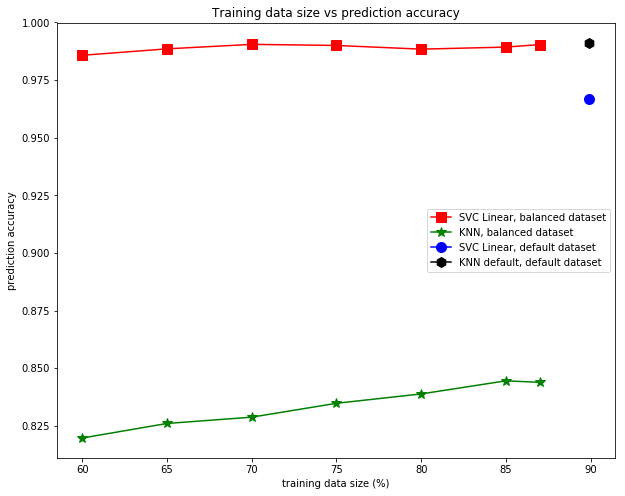

In [38]:
training_data_size = [60, 65, 70, 75, 80, 85, 87]

plt.figure(figsize=(10,8))
plt.plot(training_data_size, accuracy_model_one, marker='s', markersize=10, color='r', label='SVC Linear, balanced dataset')
plt.plot(training_data_size, accuracy_model_two, marker='*', markersize=10, color='g', label='KNN, balanced dataset')

plt.plot(original_training_data_size, accuracy_model_one_default, marker='o', markersize=10, color='b', label='SVC Linear, default dataset')
plt.plot(original_training_data_size, accuracy_model_two_default, marker='h', markersize=10, color='k', label='KNN default, default dataset')

plt.xlabel('training data size (%)')
plt.ylabel('prediction accuracy')
plt.title('Training data size vs prediction accuracy')
plt.legend()


### Compare train_test_split and cross validation

In [39]:
cv_scores_one = cross_val_score(model_one, X_combined_sm, y_combined_sm, cv=7)
# print each cv score (accuracy) and average them
print(cv_scores_one)
print('cv_scores mean for model_one: {}'.format(np.mean(cv_scores_one)))

[0.98941469 0.99314214 0.9894015  0.99376559 0.9894015  0.98877805
 0.98503741]
cv_scores mean for model_one: 0.9898486970618288


In [40]:
cv_scores_two = cross_val_score(model_two, X_combined_sm, y_combined_sm, cv=7)
# print each cv score (accuracy) and average them
print(cv_scores_two)
print('cv_scores mean for model_two: {}'.format(np.mean(cv_scores_two)))

[0.84620174 0.8298005  0.81546135 0.81421446 0.82169576 0.83665835
 0.87406484]
cv_scores mean for model_two: 0.8340138579010576


In [41]:
print('train_test_split scores mean for model_one: {}'.format(np.mean(accuracy_model_one)))
print('train_test_split scores mean for model_two: {}'.format(np.mean(accuracy_model_two)))

train_test_split scores mean for model_one: 0.9889982047845124
train_test_split scores mean for model_two: 0.8337626970483487


# TESS

## GJ 143b

In [42]:
tess_data_one = pd.read_csv('tess-time-series/GJ143b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_one.shape)
print(tess_data_one.head())

(rows, columns) in tess data: (123, 5)
              0       1      2   3  4
0  2.447869e+06  8.2469  0.021  16  1
1  2.447869e+06  8.2393  0.015  16  1
2  2.447893e+06  8.1808  0.016  16  1
3  2.447893e+06  8.2412  0.016  18  1
4  2.447893e+06  8.2202  0.009  16  1


Text(0.5, 1.0, 'Days vs magnitude for GJ 143b\n(unprocessed)')

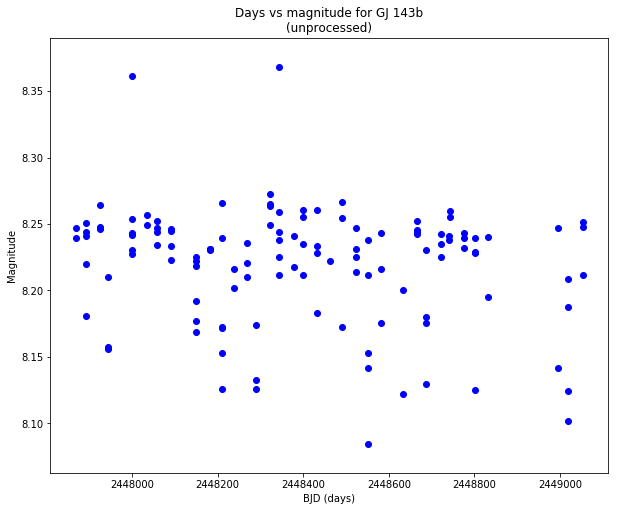

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_one[0], tess_data_one[1], color='b')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for GJ 143b\n(unprocessed)")

Text(0.5, 1.0, 'Days vs magnitude for GJ 143b\n(smoothened)')

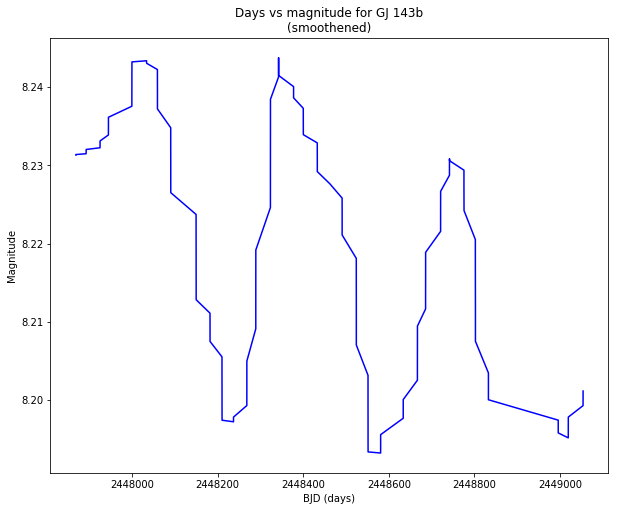

In [44]:
tess_data_one_smoothened = ndimage.filters.gaussian_filter(tess_data_one[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_one[0], tess_data_one_smoothened, color='b')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for GJ 143b\n(smoothened)")

## HD 1397b

In [45]:
tess_data_two = pd.read_csv('tess-time-series/HD1397b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_two.shape)
print(tess_data_two.head())

(rows, columns) in tess data: (152, 5)
              0       1      2  3  4
0  2.447873e+06  7.9311  0.011  0  1
1  2.447890e+06  7.9332  0.010  0  1
2  2.447891e+06  7.9456  0.010  0  1
3  2.447891e+06  7.9412  0.012  0  1
4  2.447928e+06  7.9290  0.011  0  1


Text(0.5, 1.0, 'Days vs magnitude for HD 1397 b\n(unprocessed)')

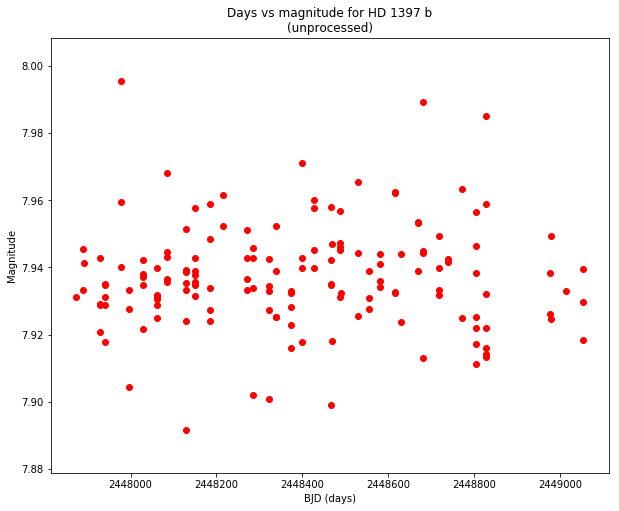

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_two[0], tess_data_two[1], color='r')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 1397 b\n(unprocessed)")

Text(0.5, 1.0, 'Days vs magnitude for HD 1397b\n(smoothened)')

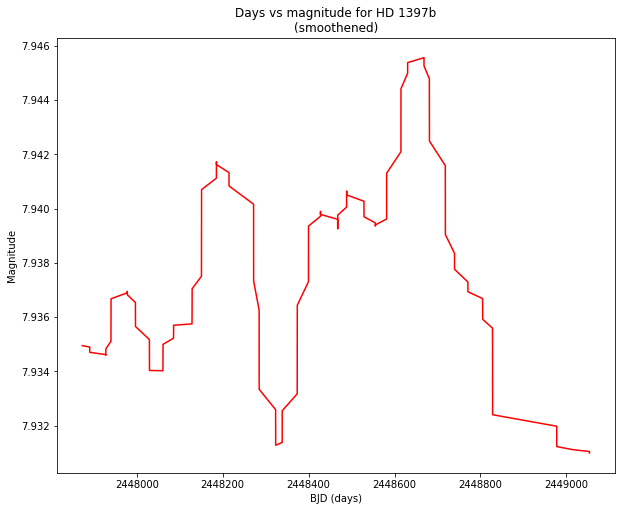

In [47]:
tess_data_two_smoothened = ndimage.filters.gaussian_filter(tess_data_two[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_two[0], tess_data_two_smoothened, color='r')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 1397b\n(smoothened)")

## HD 23472b

In [48]:
tess_data_three = pd.read_csv('tess-time-series/HD23472b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_three.shape)
print(tess_data_three.head())

(rows, columns) in tess data: (102, 5)
              0       1      2  3  4
0  2.447893e+06  9.8538  0.016  1  1
1  2.447893e+06  9.8591  0.020  1  1
2  2.447945e+06  9.8711  0.020  0  1
3  2.447945e+06  9.8548  0.019  0  1
4  2.447980e+06  9.8688  0.016  1  1


Text(0.5, 1.0, 'Days vs magnitude for HD 23472b\n(unprocessed)')

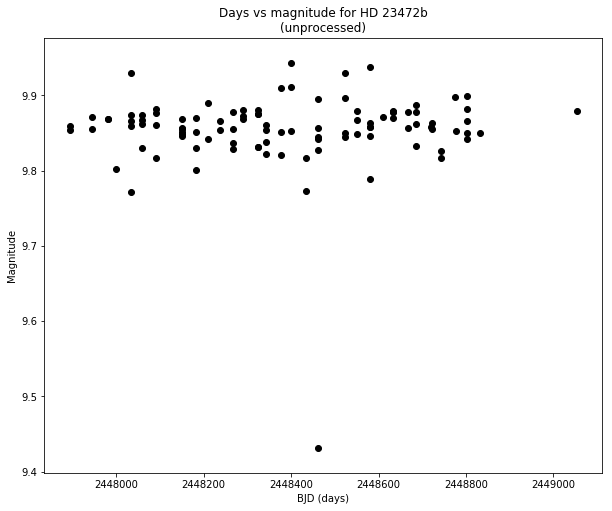

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_three[0], tess_data_three[1], color='k')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 23472b\n(unprocessed)")

Text(0.5, 1.0, 'Days vs magnitude for HD 23472b\n(smoothened)')

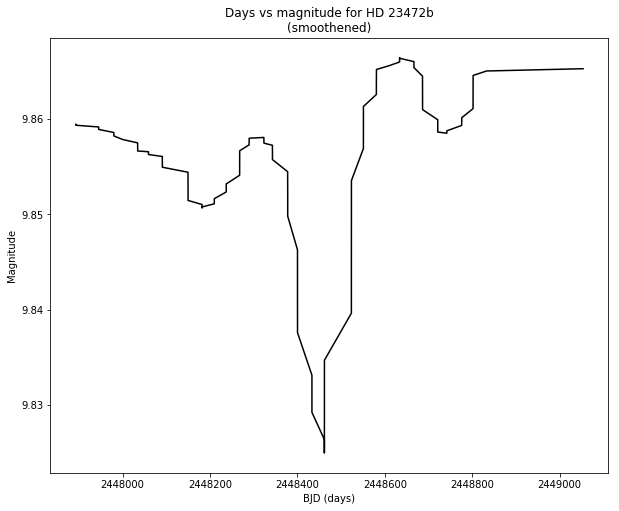

In [50]:
tess_data_three_smoothened = ndimage.filters.gaussian_filter(tess_data_three[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_three[0], tess_data_three_smoothened, color='k')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 23472b\n(smoothened)")

## HD 39091c

In [51]:
tess_data_four = pd.read_csv('tess-time-series/HD39091c.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_four.shape)
print(tess_data_four.head())

(rows, columns) in tess data: (137, 5)
              0       1      2  3  4
0  2.447836e+06  5.7893  0.005  1  1
1  2.447836e+06  5.7854  0.004  1  1
2  2.447836e+06  5.7944  0.005  1  1
3  2.447836e+06  5.7852  0.005  1  1
4  2.447889e+06  5.7697  0.006  1  1


Text(0.5, 1.0, 'Days vs magnitude for HD 39091c\n(unprocessed)')

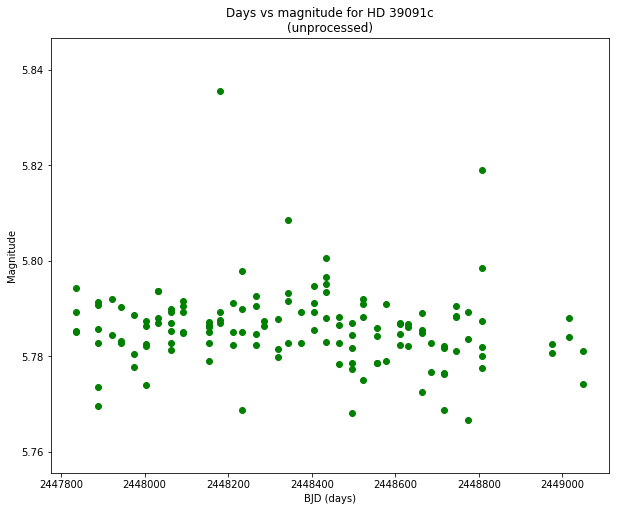

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_four[0], tess_data_four[1], color='g')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 39091c\n(unprocessed)")

Text(0.5, 1.0, 'Days vs magnitude for HD 39091c\n(smoothened)')

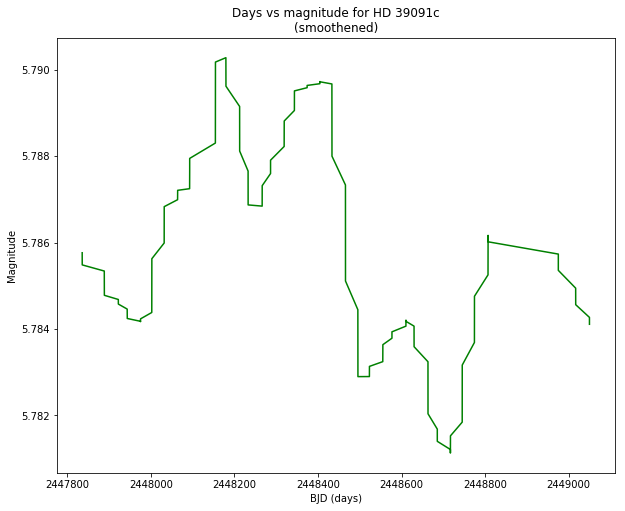

In [53]:
tess_data_four_smoothened = ndimage.filters.gaussian_filter(tess_data_four[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_four[0], tess_data_four_smoothened, color='g')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 39091c\n(smoothened)")

## HD 221416b

In [54]:
tess_data_five = pd.read_csv('tess-time-series/HD221416b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_five.shape)
print(tess_data_five.head())

(rows, columns) in tess data: (66, 5)
              0       1      2  3  4
0  2.447897e+06  8.3114  0.013  0  1
1  2.447897e+06  8.3175  0.016  0  1
2  2.448027e+06  8.3168  0.011  0  1
3  2.448027e+06  8.3112  0.010  0  1
4  2.448027e+06  8.3011  0.010  0  1


Text(0.5, 1.0, 'Days vs magnitude for HD 221416b\n(unprocessed)')

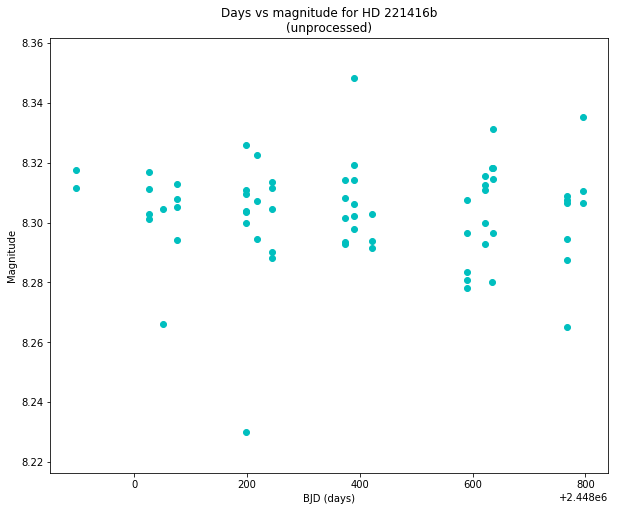

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_five[0], tess_data_five[1], color='c')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 221416b\n(unprocessed)")

Text(0.5, 1.0, 'Days vs magnitude for HD 221416b\n(smoothened)')

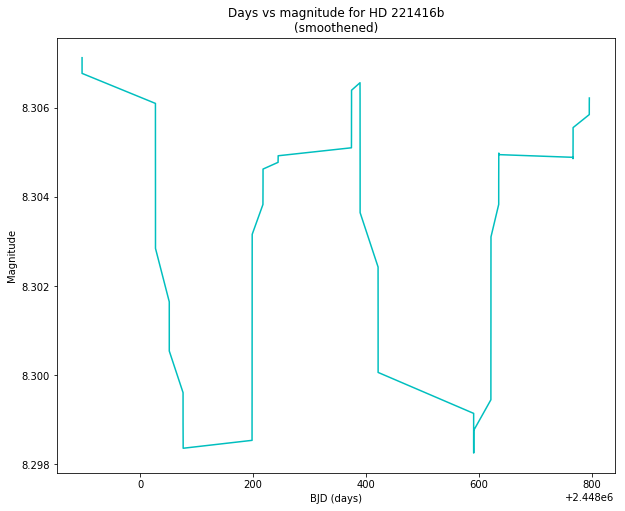

In [56]:
tess_data_five_smoothened = ndimage.filters.gaussian_filter(tess_data_five[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_five[0], tess_data_five_smoothened, color='c')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')
plt.title("Days vs magnitude for HD 221416b\n(smoothened)")